<h1 style="color: #ea2c62"><center>Predicción de supervivencia ante la insuficiencia cardíaca</center></h1>

<center><h2 style="color: #ea2c62">Exploración de Datos sobre la Insuficiencia Cardiaca</h2></center>

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial , cobrando aproximadamente 17,9 millones de vidas cada año , lo que representa el 31% de todas las muertes en todo el mundo .
La insuficiencia cardíaca es un evento común causado por las enfermedades cardiovasculares y este conjunto de datos contiene 12 características que se pueden utilizar para predecir la mortalidad por insuficiencia cardíaca.

Las personas con enfermedad cardiovascular o que tienen un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes o enfermedad ya establecida) necesitan una detección y manejo procesos en los que un modelo de aprendizaje automático puede ser de gran ayuda.


<center><img src=https://as.com/deporteyvida/imagenes/2019/05/19/portada/1558279369_573821_1558279537_noticia_normal.jpg style="width: 500px;"></center>

<h2 style="color: #ea2c62"><center>Expecificación de resultados booleanos del dataset</center></h2>
    <ul>
        <li><b>Género:</b>  Masculino = 1, Femenino =0</li>
        <li><b>Diabetes:</b>  No = 0, Si= 1</li>
        <li><b>Anemia:</b>   No = 0, Si= 1</li>
        <li><b>Alta presión en la sangre:</b>  No = 0, Si= 1</li>
        <li><b>Resultado si fuma el paciente:</b> No = 0, Si= 1</li>
        <li><b>Sobrevive el paciente:</b> No = 1, Si= 0</li>
    </ul>


<h2 style="color: #ea2c62"><center>Librerias Utilizadas para realizar la exploración de Datos</center></h2>

In [38]:
# Librerias para análisis de Datos
import pandas as pd                                                 #Incluye también funciones de representación gráfica
import numpy as np                                                  #Proporciona algunas funcionalidades matemáticas avanzadas
import matplotlib.pyplot as plt                                     #Biblioteca de trazado numérico

#  Bibliotecas de visualización de datos 
import plotly.figure_factory as ff
import plotly                                                       #Realiza gráficos interactivos, además ofrece algunos                                                                          gráficos que no encontrará en la mayoría de las                                                                               bibliotecas,como dendrogramas y gráficos 3D.

import plotly.express as px
import seaborn as sns                                               #Provee una interfaz simplificada

import plotly.graph_objects as go
from plotly.subplots import make_subplots

<h2 style="color: #ea2c62"><center>Importación del dataset</center></h2>
El dataset cuenta con 11 columnas de datos médicos, es decir posibles sintomas que influyan en los problemas de insuficiencia cardiaca. Además de una columna tiempo que indica los dias en los que el paciente realizo el tratamiento ya sea que lo dejo por (No Supervivencia o Control de IC) y una columna del Evento de Muerte que nos ayudará a realizar la predicción.

Y a su vez tenemos presente un conjunto de 299 pacientes (filas) con sus respectivos datos.

In [39]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<h2 style="color: #ea2c62"><center>División aleatoria del Dataset al 90%</center></h2>
Para el caso de la visualización de Datos tomamos un estudio al 90% de datos obtenidos en el dataset , donde implementamos una columna extra "is_train" donde los datos que reciben son booleanos ,y estos nos ayuda a identificar si es un dato de prueba o entrenamiento.

In [40]:
p_train = 0.90 # Porcentaje de datos en entrenamiento.

In [41]:
# Datos Aleatorios
dataset['is_train'] = np.random.uniform(0, 1, len(dataset)) <= p_train
train, test = dataset[dataset['is_train']==True], dataset[dataset['is_train']==False]
dataset = dataset.drop('is_train', 1)

print("Ejemplos usados para entrenamiento: ", len(train))
print("Ejemplos usados para prueba: ", len(test))

Ejemplos usados para entrenamiento:  275
Ejemplos usados para prueba:  24


<h2 style="color: #ea2c62"><center>Análisis de Datos</center></h2>
Para el análisis de datos buscamos internamente cuales son las mayores causas por el cual puedan detectar Insuficiencia cardiaca y cuán probable puede suceder un "Evento de Muerte".

Tomamos factores como: Edad, Género, Nivel de Enzimas,Porcentaje de sangre que sale del corazón en cada contracción,Hipertensión, Número de Plaquetas en la Sangre, Nivel de Creatina Sérica en la Sangre y días de tratamiento. Y estos comparandolos con valores "normales" ante los resultados obtenidos por cada paciente en el dataset.

<h2 style="color: #e4e978">¿Son la edad y el genéro un factor importante para predecir la muerte ante IC?</h2>

In [42]:
edad_datos =[train["age"].values]
edad_grupo = ['age']                                                                 #Nombre del Conjunto de Datos
figura = ff.create_distplot(edad_datos, edad_grupo)                                  #Distplot que muestra una combinación de                                                                                       de datos numéricos, como histograma,                                                                                          estimación de densidad de kernel o                                                                                            curva normal y gráfico de alfombra. 
figura.update_layout(title_text='Distribución de Datos según la edad')

figura.show()                                                                        #Visualización de datos


<b>Conclusión: </b>
Con el gráfico obtenido podemos verificar que el promedio en edad de que una persona presente IC es entre 50 y 72 años.


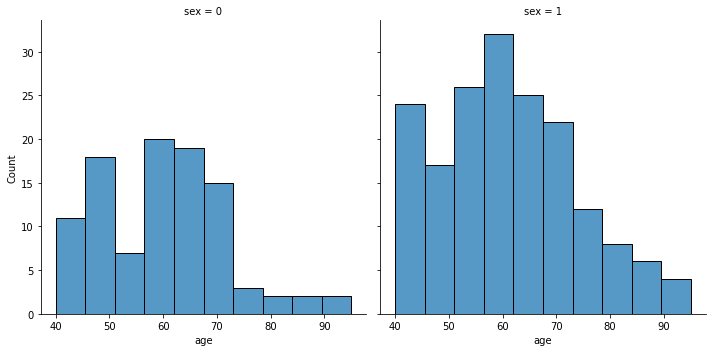

In [43]:
sns.displot(train, x="age", col="sex", multiple="dodge")    	        #Representa los datos en un histograma comparando                                                                              ambos "géneros"

<b>Conclusión: </b>
Con los gráfico obtenido podemos verificar que los Hombres(1) son más probables a padecer IC.


<h2 style="color: #e4e978">Análisis de porcentaje de Supervivencia según el género</h2>
Al obtener ambos Datos ahora podemos verificar su probabilidad de supervivenvia de los pacientes

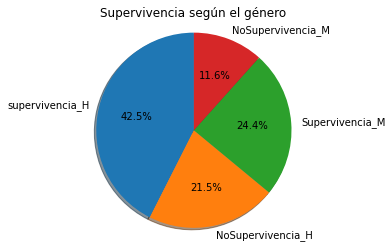

In [44]:
hombre = train[train["sex"]==1]                                           #Asignamos una variable a cada resultado de género
mujer = train[train["sex"]==0]

supervivencia_H = hombre[train["DEATH_EVENT"]==0]                         #Asignamos una variable a cada resultado de género                                                                             según su "evento de Muerte"
NoSupervivencia_H = hombre[train["DEATH_EVENT"]==1]
Supervivencia_M = mujer[train["DEATH_EVENT"]==0]
NoSupervivencia_M = mujer[train["DEATH_EVENT"]==1]

etiquetas = 'supervivencia_H', 'NoSupervivencia_H', 'Supervivencia_M', 'NoSupervivencia_M'
porcentaje = [len(hombre[train["DEATH_EVENT"]==0]),len(hombre[train["DEATH_EVENT"]==1]),
         len(mujer[train["DEATH_EVENT"]==0]),len(mujer[train["DEATH_EVENT"]==1])]       # Verificamos el porcentaje de datos                                                                                            obtenidos

fig1, ax1 = plt.subplots()
ax1.pie(porcentaje, labels=etiquetas, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Supervivencia según el género")
plt.show()

<b>Conclusión: </b>
Con los gráfico obtenido podemos verificar que al ser más probable que los hombres padezcan IC son más probables a sobrevivir con un 44.6% y las mujeres al ser poco probables a padecer IC el porcentaje de supervivenvia es bajo.


<h2 style="color: #e4e978">¿Qué tan probable es que una persona con diabetes o sin diabetes sobreviva ante la IC?</h2>
La diabetes está estrechamente asociada a la insuficiencia cardíaca y, de hecho, se estima que cerca del 40% de los pacientes con insuficiencia cardiaca son diabéticos. A su vez, la diabetes acelera la evolución de esta enfermedad cardiaca. 

In [45]:
d1 = train[(train["DEATH_EVENT"]==0) & (train["diabetes"]==0)]              #Asociamos 4 combinaciones de datos entre 
d2 = train[(train["DEATH_EVENT"]==0) & (train["diabetes"]==1)]              #el evento de muerte (0 vive - 1 muere) y 
d3 = train[(train["DEATH_EVENT"]==1) & (train["diabetes"]==0)]              #diabetes (0 no tiene - 1 tiene) a una variable.
d4 = train[(train["DEATH_EVENT"]==1) & (train["diabetes"]==1)]


label2 = ['No Diabetes - Sobrevive','Diabetes - Sobrevive', "No Diabetes -  Muere", "Diabetes  - Muere"]
values2 = [len(d1),len(d2),len(d3),len(d4)]                                 #Evaluación de porcentaje de datos obtenidos

fig = go.Figure(data=[go.Pie(labels=label2, values=values2, hole=.4)])
fig.update_layout(title_text="Implicación de Diabetes antes no Supervivencia de IC")
fig.show()




<b>Conclusión: </b>
Con el gráfico obtenido podemos verificar que un 39% de la población tiene diabetes pero solo el 13% fallece ante la IC y que un 19% de pacientes que no sobreviven no tenian diabetes.
Por el cuál la diabetes no es un factor de muerte principal ante la IC


<h2 style="color: #e4e978">¿Qué tan probable es que una persona con un bajo porcentaje de sangre que sale del corazón en cada contracción  no sobreviva ante la IC?</h2>
La fracción de eyección (FE) es una medición, expresada como un porcentaje, de la cantidad de sangre que el ventrículo izquierdo bombea hacia fuera con cada contracción.
Donde:

- Una fracción de eyección normal del corazón puede estar entre el 50% y el 70%.

- Una FE del 41% al 49% puede considerarse “limítrofe”. No siempre indica que una persona está desarrollando insuficiencia cardíaca. En cambio, puede indicar daños, quizás de un ataque al corazón anterior.

- Una medición de la fracción de eyección inferior al 40% puede ser evidencia de insuficiencia cardíaca o miocardiopatía.

- Una medición de la fracción de eyección superior al 75% puede indicar una enfermedad cardíaca, como la miocardiopatía hipertrófica.  




In [46]:
porcentajeS = px.histogram(train, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=train.columns)
porcentajeS.update_layout(title_text="Estudio de Supervivencia respecto a Ejection Fraction")
porcentajeS.show()

<b>Conclusión: </b>
Con el gráfico obtenido podemos verificar que el porcentaje de personas que mueren atraves de tener una medición de fracción de eyección que sale del rango normal mueren ante la IC, exponiendo tambien casos en los que también un buen porcentaje sobrevive padeciendo este estado.


<h2 style="color: #e4e978">¿Son el desvalance en el promedio normal de plaquetas una razón para determinar la Supervivencia ante IC?</h2>
Las plaquetas, son células sanguíneas producidas en la médula ósea y que son responsables por el proceso de coagulación sanguínea.

El valor normal de las plaquetas es entre <b>150 000 y 450 000 kiloplaquetas/ mL de sangre</b>, sin embargo, algunas condiciones pueden interferir en el proceso de producción de las plaquetas, habiendo un aumento o disminución de su concentración en la sangre, esta condición se conoce como trombocitopenia.

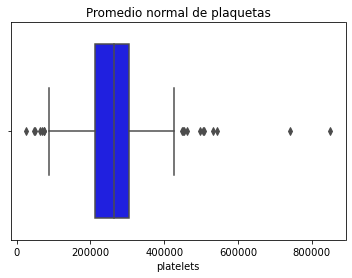

In [47]:
sns.boxplot(x = train.platelets, color = 'blue')
plt.title("Promedio normal de plaquetas")
plt.show()

En el siguiente gráfico podemos observar el promedio en el que se encuentran el número de plaquetas y los puntos marcados representan los valores atípicos.


In [48]:
porcentajeP = px.histogram(train, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=train.columns)
porcentajeP.update_layout(title_text="Estudio de Supervivencia respecto al número de plaquetas")
porcentajeP.show()

<b>Conclusión: </b>
Con el gráfico obtenido podemos verificar que varias personas  mueren al tener un desvalace en el primedio normal de plaquetas adjunto con una fracción de eyección baja y una edad elevada.


<h2 style="color: #e4e978">¿Es la hipertensión un factor importante ante la supervivencia de IC?</h2>
La insuficiencia cardíaca es una de las principales causas de morbimortalidad cardiovascular y la primera causa de hospitalizaciones en pacientes de más de 65 años. 

Esto ha motivado un interés creciente por la detección de los pacientes asintomáticos, pero con un alto riesgo de desarrollar insuficiencia cardíaca debido a la presencia de factores de riesgo bien determinados, que si no se controlan llevarán a un alto porcentaje de pacientes a presentar síntomas de insuficiencia cardíaca.

La hipertensión arterial es el factor de riesgo más comúnmente detectado en pacientes que desarrollan insuficiencia cardíaca, y su tratamiento ha demostrado ser capaz de reducir la incidencia de insuficiencia cardíaca en un 52%.

In [49]:
SiH = train[train['high_blood_pressure']==1]            	             #Asignación de resultados en variables
NoH = train[train['high_blood_pressure']==0]

SiHSobrevive= SiH[train["DEATH_EVENT"]==0]                               #Evaluación de hipertención ante un evento de muerte
SiHNoSobrevive = SiH[train["DEATH_EVENT"]==1]
NoHSobrevive = NoH[train["DEATH_EVENT"]==0]
NoHNoSobrevive = NoH[train["DEATH_EVENT"]==1]

labels = ['Si H - Sobrevive','Si H - No Sobrevive', 'No H - Sobrevive', 'No H - No Sobrevive']
values = [len(SiH[train["DEATH_EVENT"]==0]),len(SiH[train["DEATH_EVENT"]==1]),
         len(NoH[train["DEATH_EVENT"]==0]),len(NoH[train["DEATH_EVENT"]==1])]
Hip = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
Hip.update_layout(
    title_text="Analisis de Supervivencia según la Hipertensión")
Hip.show()


<b>Conclusión: </b>
Con el gráfico obtenido podemos verificar que mas del 40% de personas que tienen hipertensión el 13% fallece con insuficiencia Cardiaca.

<h2 style="color: #e4e978"> ¿Es el alto nivel de enzimas un factor para la No Supervivencia ante la IC?</h2>
Las enzimas son proteínas complejas que producen un cambio químico específico en todas las partes del cuerpo. Por ejemplo, pueden ayudar a descomponer los alimentos que consumimos para que el cuerpo los pueda usar. La coagulación de la sangre es otro ejemplo del trabajo de las enzimas.

Normalmente se encuentran niveles bajos de estas proteínas y enzimas en la sangre, pero si el músculo cardíaco está lesionado, como por un ataque cardíaco , las proteínas y enzimas se escapan de las células dañadas del músculo cardíaco y aumentan sus niveles en el torrente sanguíneo.

Valores normales de CPK total: de 10 a 120 microgramos por litro (mcg/L)


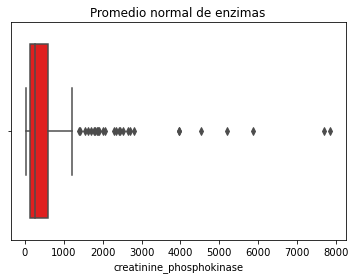

In [50]:
sns.boxplot(x = train.creatinine_phosphokinase, color = 'red')
plt.title("Promedio normal de enzimas")
plt.show()

In [51]:
porcentajeE = px.histogram(train, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=train.columns)
porcentajeE.update_layout(title_text="Estudio de Supervivencia respecto al número de enzimas en la sangre")
porcentajeE.show()

<b>Conclusión: </b>
Con el gráfico obtenido podemos verificar que al tener el paciente un alto número de enzimas en la Sangre estos tienden a fallecer ante la insuficiencia cardiaca

<h2 style="color: #e4e978">¿Es el alto nivel de creatinina sérica un factor para la No Supervivencia ante la IC?</h2>
La creatinina es un producto de desecho generado por los músculos como parte de la actividad diaria. Normalmente, los riñones filtran la creatinina de la sangre y la expulsan del cuerpo por la orina. 

Un resultado normal de nivel de creatinina sérica es de 0.7 a 1.3 mg/dL (de 61.9 a 114.9 µmol/L) para los hombres y de 0.6 a 1.1 mg/dL (de 53 a 97.2 µmol/L) para las mujeres. Las mujeres con frecuencia tienen niveles de creatinina más bajos que los hombres. Esto se debe a que ellas frecuentemente tienen menor masa muscular.


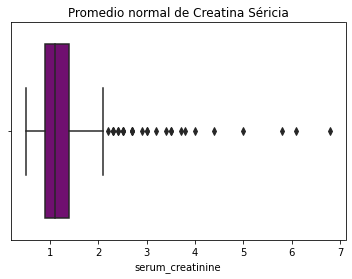

In [52]:
sns.boxplot(x = train.serum_creatinine, color = 'purple')
plt.title("Promedio normal de Creatinina Séricia")
plt.show()

In [53]:
porcentajeC = px.histogram(train, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=train.columns)
porcentajeC.update_layout(title_text="Estudio de Supervivencia respecto al nivel de Creatinina en la Sangre")
porcentajeC.show()

<b>Conclusión: </b>
Con el gráfico obtenido podemos verificar que los pacientes con un alto nivel de Creatinina en la sangre tienden a fallecer tomando en cuenta el caso mas alto del 9.4%